# Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the excel sheet

In [2]:
df = pd.read_excel('Historical_data.xlsx')

In [3]:
df2 = df.copy()

In [4]:
print(pd.crosstab(df['personal_loan'],df['term_deposit_subscribed']))

term_deposit_subscribed      0     1
personal_loan                       
no                       17696  2305
yes                       3549   217


In [5]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


###Checking for unwanted columns

#####There is no unwanted column

###Checking for columns with single value

#####There is no column with single value

#### Finding the missing values in different columns

In [6]:
df.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

### Replacing the NaN age column by ``mean`` age & NaN personal loan ``no``

In [7]:
df['customer_age'] = df['customer_age'].replace(np.NaN,int(df['customer_age'].mean()))
df['personal_loan'] = df['personal_loan'].replace(np.NaN,'no')

In [8]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

### Printing the index of missing values of `balance` column and `subscription` status

In [9]:
balance = df['balance'].values.reshape(len(df),1)                                                      
result = df['term_deposit_subscribed'].values.reshape(len(df),1)                                               
for item in np.argwhere(np.isnan(np.concatenate((balance,result),axis=1))):
  print(item)

[42  0]
[88  0]
[398   0]
[518   0]
[1037    0]
[1051    0]
[1057    0]
[1112    0]
[1162    0]
[1246    0]
[1313    0]
[1330    0]
[1571    0]
[1781    0]
[1814    0]
[1820    0]
[1824    0]
[1853    0]
[2009    0]
[2082    0]
[2206    0]
[2256    0]
[2537    0]
[2553    0]
[2623    0]
[2632    0]
[2652    0]
[2715    0]
[2766    0]
[2813    0]
[2940    0]
[3191    0]
[3224    0]
[3258    0]
[3453    0]
[3558    0]
[3752    0]
[3889    0]
[4073    0]
[4466    0]
[4546    0]
[4562    0]
[4724    0]
[4780    0]
[4800    0]
[4804    0]
[4999    0]
[5021    0]
[5034    0]
[5046    0]
[5084    0]
[5092    0]
[5226    0]
[5236    0]
[5361    0]
[5668    0]
[5863    0]
[5870    0]
[6059    0]
[6078    0]
[6106    0]
[6130    0]
[6147    0]
[6526    0]
[6542    0]
[6740    0]
[6881    0]
[6981    0]
[6992    0]
[7138    0]
[7156    0]
[7164    0]
[7566    0]
[7751    0]
[7766    0]
[7800    0]
[7844    0]
[7993    0]
[7995    0]
[8056    0]
[8144    0]
[8208    0]
[8385    0]
[8606    0]
[873

## Replacing the missing values of recent campaign contacts with previous campaign contacts 

In [10]:
num = df['num_contacts_in_campaign'].values.reshape(len(df),1)                    #   To get rid of the missing values present in balance column,
prev = df['num_contacts_prev_campaign'].values.reshape(len(df),1)                 #   we replaced them with values of previous campaign

In [11]:
index = []
for i in np.argwhere(np.isnan(np.concatenate((num,prev),axis=1))):
  index.append(i[0])

con = np.concatenate((num,prev),axis=1)
for i in index:
  con[i][0] = con[i][1]
  # print(con[i])
dic = {}
for i in range(0,len(index)):
  dic[index[i]] = con[i][0]

print(dic)


{101: 2.0, 1071: 2.0, 1401: 4.0, 1808: 1.0, 1891: 2.0, 2246: 2.0, 2649: 2.0, 2772: 1.0, 2810: 6.0, 3156: 1.0, 3405: 1.0, 4109: 1.0, 4271: 1.0, 4337: 1.0, 4396: 1.0, 4465: 2.0, 4536: 2.0, 4734: 2.0, 5097: 1.0, 5213: 3.0, 5383: 3.0, 5598: 1.0, 5830: 2.0, 6185: 5.0, 6855: 2.0, 7366: 1.0, 7763: 2.0, 8659: 8.0, 8860: 3.0, 9269: 10.0, 9351: 6.0, 9685: 2.0, 9719: 5.0, 10098: 17.0, 10319: 1.0, 10480: 4.0, 10566: 1.0, 11640: 1.0, 11843: 2.0, 11865: 2.0, 11957: 3.0, 12017: 2.0, 12157: 1.0, 12217: 2.0, 12632: 1.0, 13182: 13.0, 13495: 30.0, 13808: 2.0, 13857: 1.0, 14753: 4.0, 14842: 2.0, 15603: 2.0, 15698: 2.0, 15892: 2.0, 15934: 1.0, 16095: 5.0, 16208: 2.0, 16250: 2.0, 16451: 1.0, 16578: 2.0, 16613: 2.0, 16664: 2.0, 16926: 1.0, 16975: 13.0, 17640: 2.0, 17827: 1.0, 17902: 6.0, 17927: 2.0, 18001: 6.0, 18442: 2.0, 19127: 1.0, 19658: 2.0, 19748: 4.0, 19761: 1.0, 19906: 2.0, 20077: 4.0, 20100: 4.0, 20195: 1.0, 20322: 2.0, 20529: 1.0, 20690: 4.0, 20833: 1.0, 20892: 1.0, 20966: 2.0, 21149: 10.0, 21285: 

In [12]:
n = df['num_contacts_in_campaign'].values

for i in range(0,len(n)):
  if i in dic:
    n[i] = dic[i]

df['num_contacts_in_campaign'] = pd.Series(n)

In [13]:
df = df.dropna()

In [14]:
df3 = df.copy()

In [15]:
df3.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [16]:
df.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [17]:
count = 0
for item in df3['balance'].values:
  if item < 0 :
    count = count +1

print(count)

2953


In [18]:
i = 0
for item in zip(df3['balance'].values,df3['term_deposit_subscribed'].values):
  if i < 2960:
    if item[1] == 1 and item[0] < 0:
      print(item)
    i = i+1
  if i == 2960:
    break

(-483.0, 1)
(-4.0, 1)
(-40.0, 1)
(-4.0, 1)
(-3.0, 1)
(-25.0, 1)
(-838.0, 1)
(-2.0, 1)
(-38.0, 1)
(-4.0, 1)
(-90.0, 1)
(-5.0, 1)
(-3060.0, 1)
(-149.0, 1)
(-721.0, 1)
(-4.0, 1)
(-4.0, 1)


In [19]:
for item in df3.columns[2:]:
  if item not in ['balance','communication_type','month',
                  'last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign'] :
    print(df3[item].value_counts())
    print()

blue-collar      5081
management       4933
technician       3914
admin.           2670
services         2195
retired          1150
self-employed     836
entrepreneur      762
unemployed        664
housemaid         647
student           494
unknown           154
Name: job_type, dtype: int64

married     14098
single       6635
divorced     2767
Name: marital, dtype: int64

secondary    12124
tertiary      6891
primary       3516
unknown        969
Name: education, dtype: int64

no     23079
yes      421
Name: default, dtype: int64

yes    13155
no     10345
Name: housing_loan, dtype: int64

no     19795
yes     3705
Name: personal_loan, dtype: int64

20    1415
18    1210
21    1046
6     1018
17    1016
5      981
7      956
14     946
8      944
28     922
19     909
29     908
15     889
12     843
30     818
11     812
9      805
13     804
4      753
16     744
2      634
3      587
27     571
26     528
23     505
22     482
25     429
31     353
10     258
24     235
1      179

In [20]:
for item in df3.columns[2:]:
  if item not in ['default','balance','communication_type',
                  'last_contact_duration','num_contacts_in_campaign',
                  'num_contacts_prev_campaign','term_deposit_subscribed'] :
    print(pd.crosstab(df3[item],df3['term_deposit_subscribed']))
    print()

term_deposit_subscribed     0    1
job_type                          
admin.                   2394  276
blue-collar              4751  330
entrepreneur              700   62
housemaid                 599   48
management               4328  605
retired                   897  253
self-employed             736  100
services                 2013  182
student                   357  137
technician               3522  392
unemployed                561  103
unknown                   135   19

term_deposit_subscribed      0     1
marital                             
divorced                  2476   291
married                  12789  1309
single                    5728   907

term_deposit_subscribed      0     1
education                           
primary                   3237   279
secondary                10969  1155
tertiary                  5938   953
unknown                    849   120

term_deposit_subscribed      0     1
housing_loan                        
no                        

In [21]:
df3.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [22]:
df3 = df3.iloc[:,1:]
df3.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


##Exploring the categorical features

In [23]:
categorical_features = [feature for feature in df3.columns if ((df3[feature].dtypes=='O') & (feature not in ['term_deposit_subscribed']))]
categorical_features

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [24]:
for feature in categorical_features:
  print("The feature {} and number of categories are {}".format(feature,len(df3[feature].unique())))

The feature job_type and number of categories are 12
The feature marital and number of categories are 3
The feature education and number of categories are 4
The feature default and number of categories are 2
The feature housing_loan and number of categories are 2
The feature personal_loan and number of categories are 2
The feature communication_type and number of categories are 3
The feature month and number of categories are 12
The feature prev_campaign_outcome and number of categories are 4


#Inference
###There are 9 categorical features
###Features job type and month have highest number of categorical features


##Categorical feature distribution

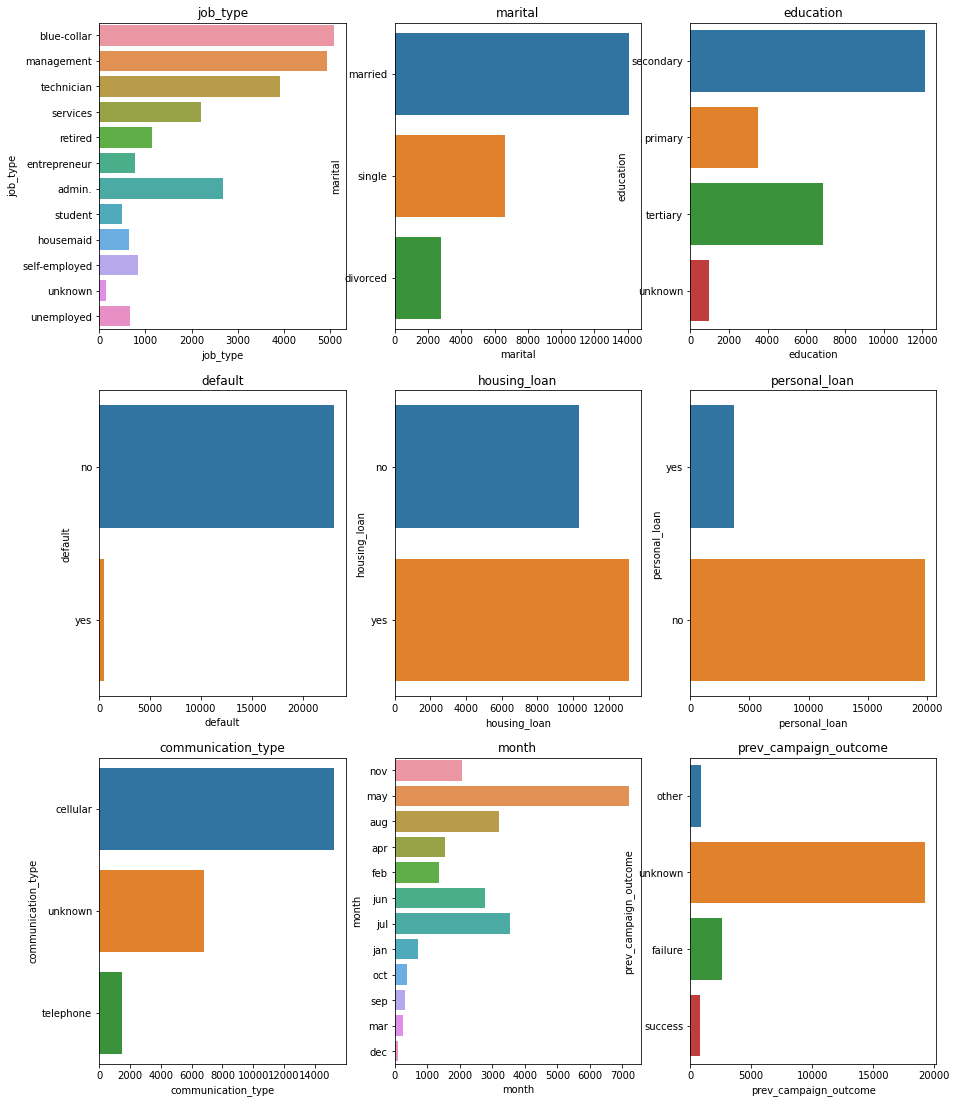

In [25]:
plt.figure (figsize=(15,80), facecolor ='white')                                 # Now we will plot barplots of the categorical feature 
plotnumber =1                                                                    # distribution to get a rough idea of different ratios
for categorical_feature in categorical_features:                                         
  ax = plt.subplot (12,3, plotnumber)
  sns.countplot (y = categorical_feature, data=df3)
  plt.xlabel (categorical_feature)
  plt.title(categorical_feature)
  plotnumber += 1
plt.show()

#Inference
#####➤For clients with job type as blue collar, records are highest while for students it is lowest
#####➤For clients with marital status married, records are highest while for divorced it is lowest
#####➤For clients with education qualification secondary, records are highest while for primary it is lowest
#####➤Default doesn't seem to play important role since the yes to no ratio is very high, so we can drop it
#####➤Data in month of May is highest, while in December it is lowest

##Relationship between categorical features and labels

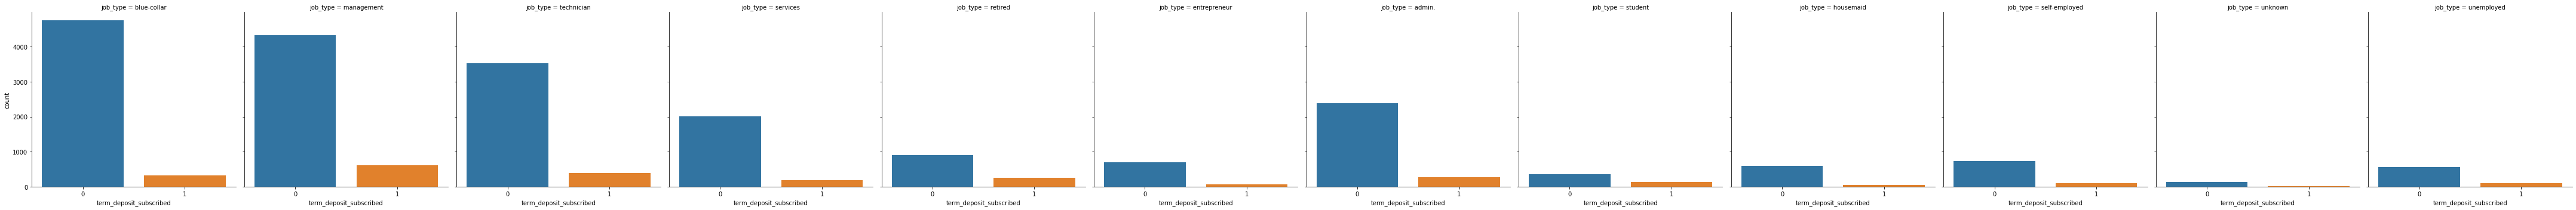

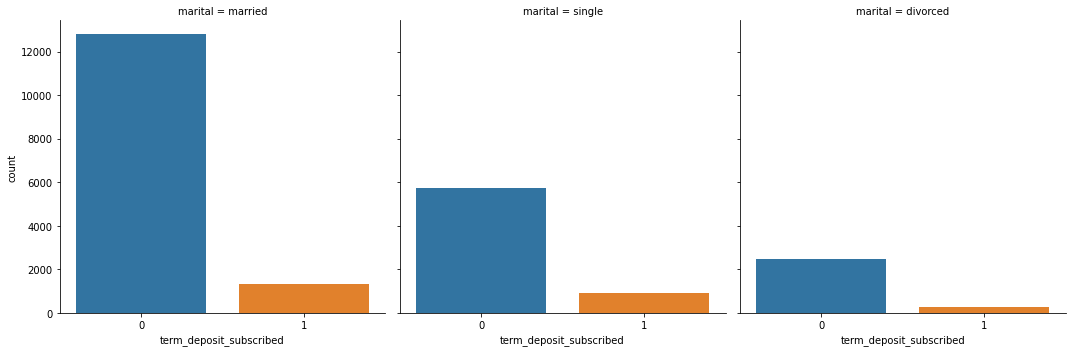

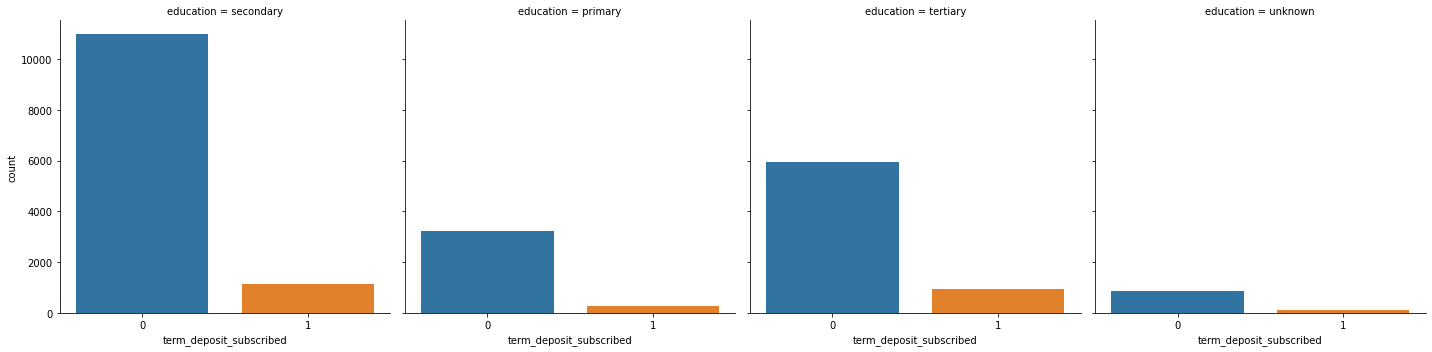

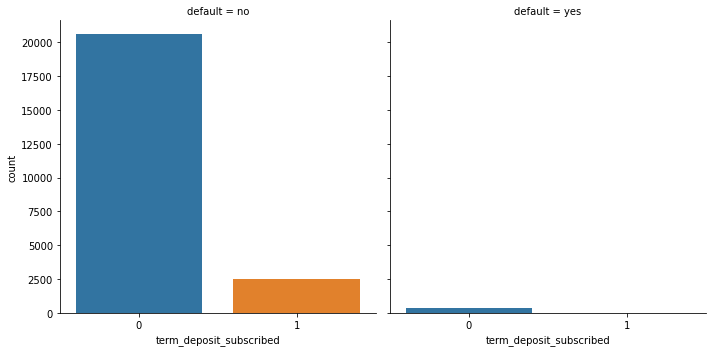

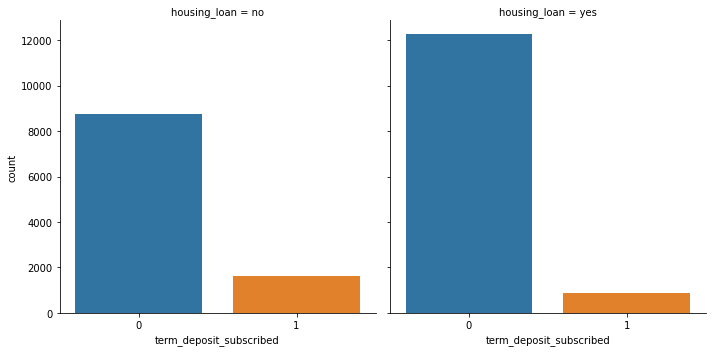

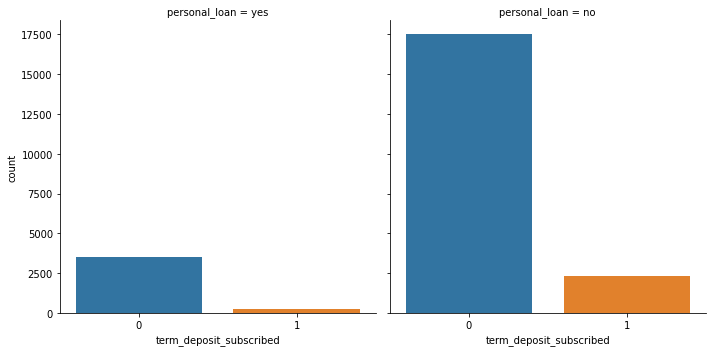

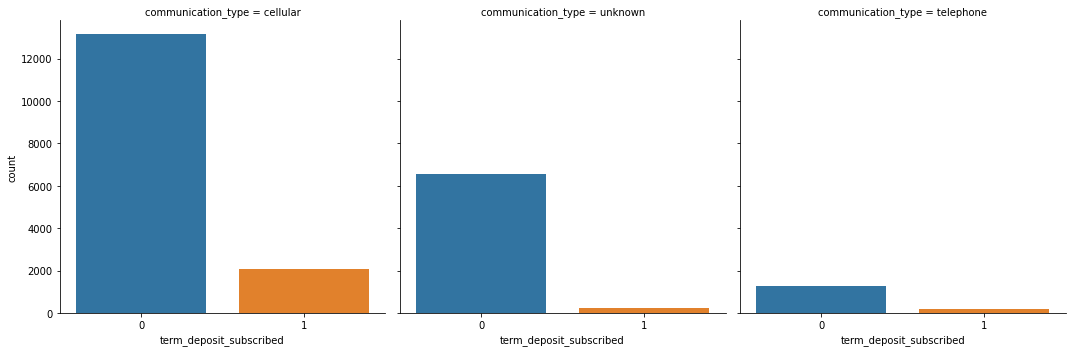

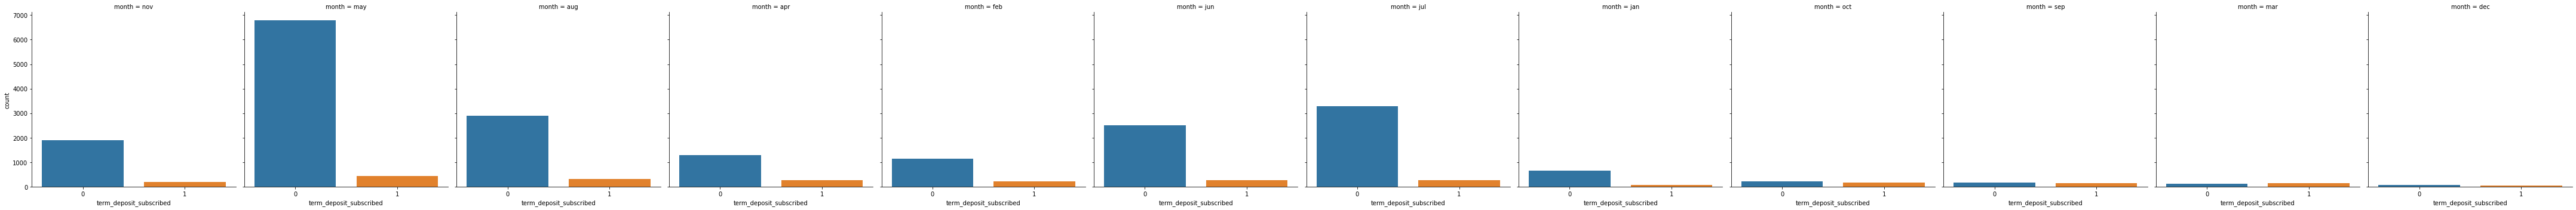

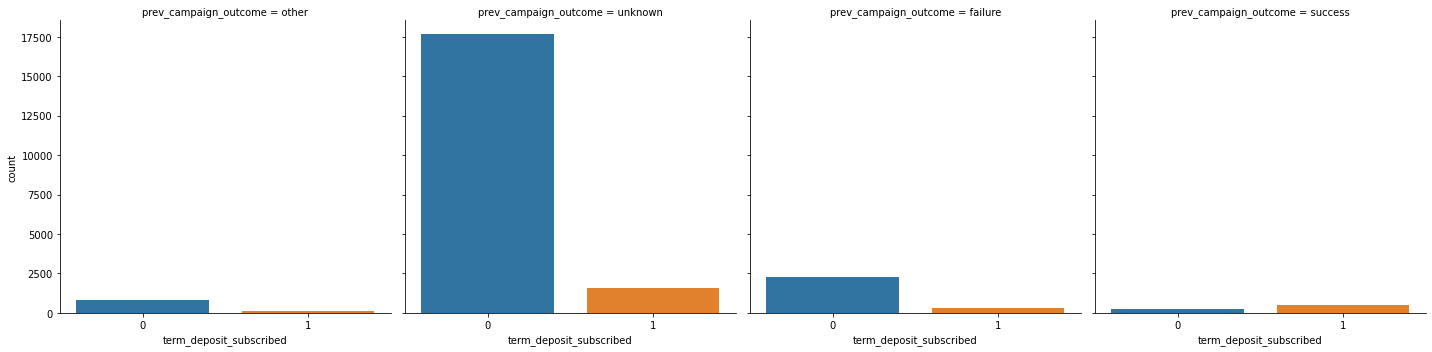

In [26]:
for categorical_feature in categorical_features:
  sns.catplot(x='term_deposit_subscribed',col=categorical_feature,kind='count',data=df3)
plt.show()

In [27]:
for categorical_feature in categorical_features:
  print(df3.groupby(['term_deposit_subscribed',categorical_feature]).size())

term_deposit_subscribed  job_type     
0                        admin.           2394
                         blue-collar      4751
                         entrepreneur      700
                         housemaid         599
                         management       4328
                         retired           897
                         self-employed     736
                         services         2013
                         student           357
                         technician       3522
                         unemployed        561
                         unknown           135
1                        admin.            276
                         blue-collar       330
                         entrepreneur       62
                         housemaid          48
                         management        605
                         retired           253
                         self-employed     100
                         services          182
                     

##Inference
######➤Students have highest interest on deposit
######➤Client who has housing loan doesn't seem interested in deposit
######➤If for a client the previous campaign outcome was a success then there is a high chance of deposit
######➤In the month of March,September,October,December clients show high interest on deposit
######➤In May the record is high but the client interest ratio is less

##Exploring the numerical features

In [28]:
numerical_features = [feature for feature in df3.columns if ((df3[feature].dtypes != 'O') & (feature not in ['term_deposit_subscribed']))]
print("Number of numerical variable : ",len(numerical_features))

df3[numerical_features].head()

Number of numerical variable :  6


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,34.0,934.0,18,704,2.0,1
1,41.0,1352.0,13,893,2.0,0
2,57.0,495.0,18,796,4.0,0
3,37.0,650.0,26,880,1.0,0
4,29.0,265.0,19,795,2.0,0


###Inference
#####➤There are 6 numerical features

##Finding discrete numerical features

In [29]:
discrete_feature = [feature for feature in numerical_features if len(df3[feature].unique()) < 25]
print("Descrete variables Count : {}".format(len(discrete_feature)))

Descrete variables Count : 0


##Inference
######➤There is no discrete numerical feature

##Finding continuous numerical features

In [30]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['term_deposit_subscribed']]
print(continuous_features)
print("Continuous feature Count {}".format(len(continuous_features)))

['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']
Continuous feature Count 6


##Inference
#####➤There are 6 continuous numerical features

##Continuous numerical feature distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

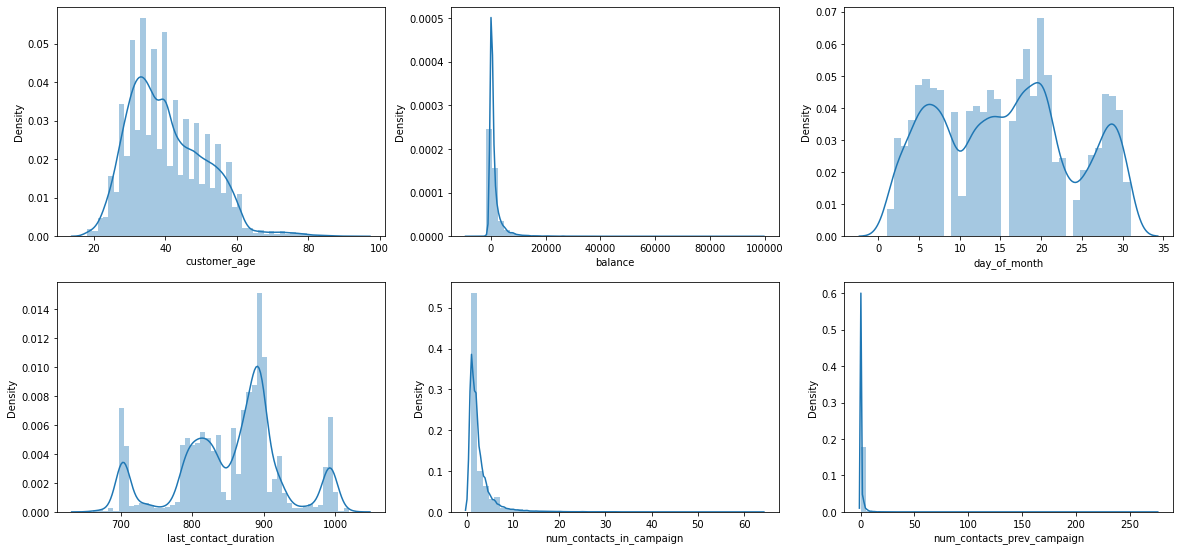

In [31]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.distplot(df3[continuous_feature])
  plt.xlabel(continuous_feature)
  plotnumber += 1
plt.show()

##Inference
#####➤It seems customer age,day of month and last contact duration are distributed normally
#####➤Balance,number of contacts in recent and previous campaign are heavily skewed towards left and seem to have some outliers

##Relationship between continuous numerical features and labels

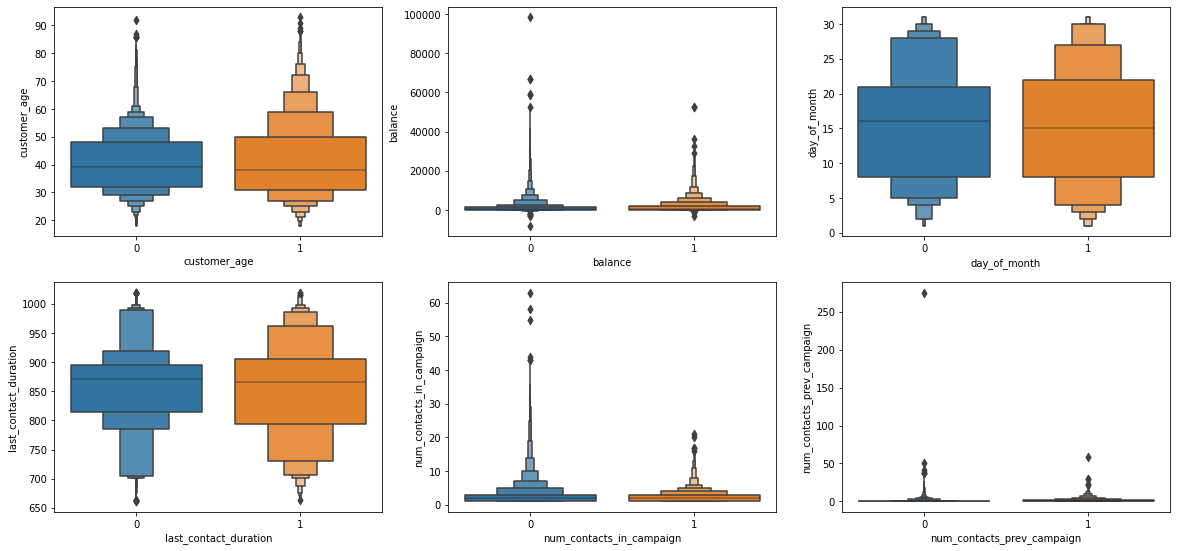

In [32]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxenplot(x="term_deposit_subscribed",y=df3[feature],data = df3)
  plt.xlabel(feature)
  plotnumber += 1
plt.show()

##Finding outliers in numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

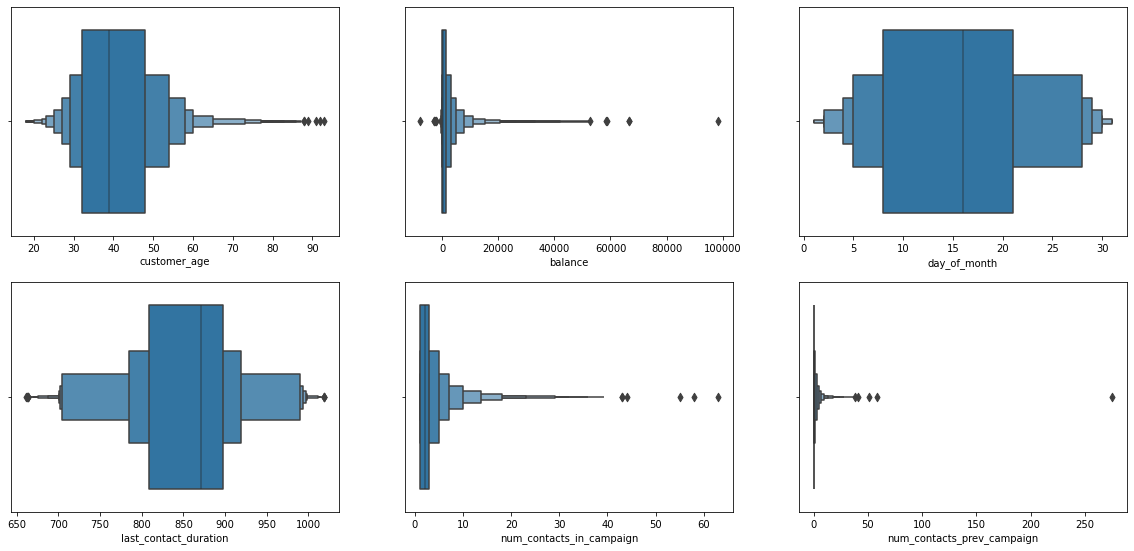

In [33]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features: 
   ax = plt.subplot(12,3,plotnumber)  
   sns.boxenplot(df3[numerical_feature])  
   plt.xlabel(numerical_feature)  
   plotnumber += 1
plt.show()

##Inference
#####➤Customer age,balance,last contact duration,number of contacts in recent and previous campaign have some outliers

##Exploring the correlationship between numerical features

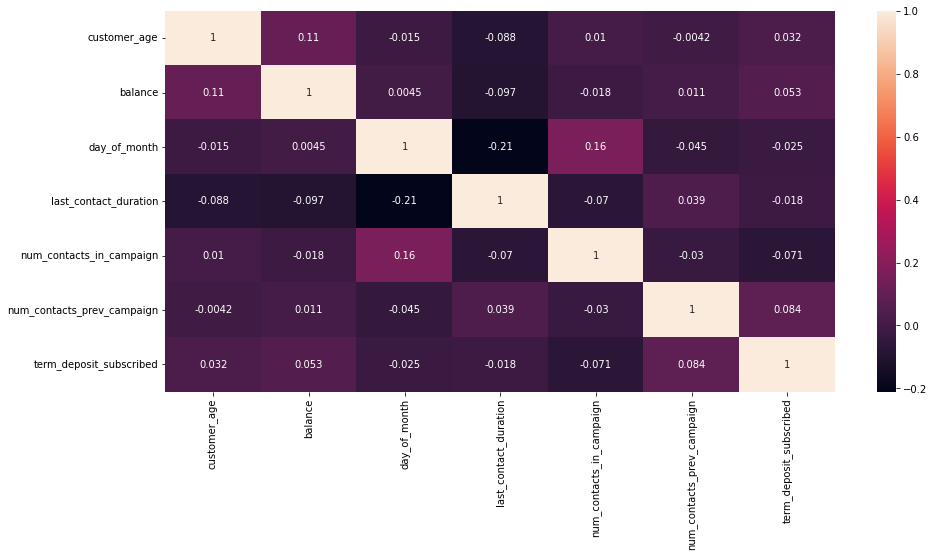

In [34]:
cor_mat = df3.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

##Inference
######➤No feature is heavily correlated with other features

##Distribution of customers based on subscription status

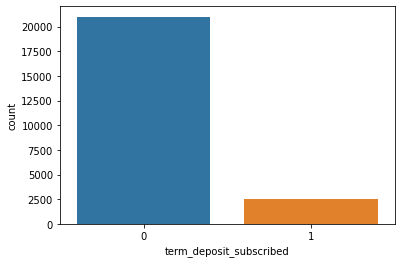

In [35]:
sns.countplot(x="term_deposit_subscribed",data = df3)
plt.show()

In [36]:
df3['term_deposit_subscribed'].groupby(df3['term_deposit_subscribed']).count()

term_deposit_subscribed
0    20993
1     2507
Name: term_deposit_subscribed, dtype: int64

In [37]:
df2 = df3.copy()

In [38]:
df2.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [39]:
df2.shape

(23500, 16)

#Feature Engineering

##Dropping unwanted features

In [40]:
df2.groupby(['term_deposit_subscribed','default']).size()

term_deposit_subscribed  default
0                        no         20598
                         yes          395
1                        no          2481
                         yes           26
dtype: int64

In [41]:
df2.drop(['default'],axis=1,inplace=True)

##Removing outliers

In [42]:
df2.groupby(['term_deposit_subscribed','last_contact_duration'],sort=True)['last_contact_duration'].count()

term_deposit_subscribed  last_contact_duration
0                        661                      1
                         662                      2
                         663                      2
                         664                      5
                         665                      1
                                                 ..
1                        1012                     8
                         1013                     3
                         1014                     4
                         1015                     2
                         1018                     2
Name: last_contact_duration, Length: 585, dtype: int64

In [43]:
df2.groupby(['term_deposit_subscribed','num_contacts_in_campaign'],sort=True)['num_contacts_in_campaign'].count()

term_deposit_subscribed  num_contacts_in_campaign
0                        1.0                         7900
                         2.0                         5834
                         3.0                         2576
                         4.0                         1675
                         5.0                          856
                                                     ... 
1                        15.0                           3
                         16.0                           1
                         17.0                           2
                         20.0                           1
                         21.0                           1
Name: num_contacts_in_campaign, Length: 62, dtype: int64

In [44]:
for item in df2.groupby(['term_deposit_subscribed','num_contacts_in_campaign'],sort=True)['num_contacts_in_campaign']:
  [print(i) for i in item]

(0, 1.0)
3        1.0
9        1.0
10       1.0
11       1.0
12       1.0
        ... 
23865    1.0
23867    1.0
23868    1.0
23869    1.0
23870    1.0
Name: num_contacts_in_campaign, Length: 7900, dtype: float64
(0, 2.0)
0        2.0
1        2.0
4        2.0
5        2.0
6        2.0
        ... 
23859    2.0
23863    2.0
23872    2.0
23875    2.0
23877    2.0
Name: num_contacts_in_campaign, Length: 5834, dtype: float64
(0, 3.0)
20       3.0
96       3.0
97       3.0
114      3.0
125      3.0
        ... 
23838    3.0
23852    3.0
23855    3.0
23857    3.0
23864    3.0
Name: num_contacts_in_campaign, Length: 2576, dtype: float64
(0, 4.0)
35       4.0
49       4.0
72       4.0
75       4.0
76       4.0
        ... 
23830    4.0
23836    4.0
23858    4.0
23866    4.0
23873    4.0
Name: num_contacts_in_campaign, Length: 1675, dtype: float64
(0, 5.0)
23       5.0
32       5.0
55       5.0
148      5.0
153      5.0
        ... 
23745    5.0
23771    5.0
23808    5.0
23833    5.0
23871    

In [45]:
df2.groupby(['term_deposit_subscribed','num_contacts_prev_campaign'],sort=True)['num_contacts_prev_campaign'].count()

term_deposit_subscribed  num_contacts_prev_campaign
0                        0                             17654
                         1                              1142
                         2                               883
                         3                               444
                         4                               297
                         5                               173
                         6                                96
                         7                                78
                         8                                48
                         9                                31
                         10                               25
                         11                               23
                         12                               17
                         13                               15
                         14                                9
                         15      

In [46]:
df3 = df2[df2['num_contacts_in_campaign'] < 22]

In [47]:
df3.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [48]:
df3.groupby(['term_deposit_subscribed','num_contacts_in_campaign'],sort=True)['num_contacts_in_campaign'].count()

term_deposit_subscribed  num_contacts_in_campaign
0                        1.0                         7900
                         2.0                         5834
                         3.0                         2576
                         4.0                         1675
                         5.0                          856
                         6.0                          613
                         7.0                          365
                         8.0                          263
                         9.0                          162
                         10.0                         140
                         11.0                          97
                         12.0                          75
                         13.0                          78
                         14.0                          41
                         15.0                          45
                         16.0                          37
                      

In [49]:
df4 = df3[df3['num_contacts_in_campaign'] < 22]

##Converting categorical features into numerical features

In [50]:
cat_columns = ['job_type','marital','education','communication_type','month','prev_campaign_outcome']
for col in cat_columns:
  df4 = pd.concat([df4.drop(col,axis=1),pd.get_dummies(df4[col],prefix=col,prefix_sep="_",drop_first=True,dummy_na=False)],axis=1)

In [51]:
bool_columns = ['housing_loan', 'personal_loan']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [52]:
df4.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown,housing_loan_new,personal_loan_new
0,34.0,934.0,18,704,2.0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,41.0,1352.0,13,893,2.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
2,57.0,495.0,18,796,4.0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,37.0,650.0,26,880,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,29.0,265.0,19,795,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [53]:
df4.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management',
       'job_type_retired', 'job_type_self-employed', 'job_type_services',
       'job_type_student', 'job_type_technician', 'job_type_unemployed',
       'job_type_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'communication_type_telephone', 'communication_type_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown',
       'housing_loan_new', 'personal_loan_new'],
      dtype='object')

##Splitting dataset into training set and test set

In [54]:
y = df4['term_deposit_subscribed'].values

In [55]:
print(y)

[0 0 1 ... 0 0 0]


In [56]:
df5 = df4.copy()

In [57]:
df5 = df5.drop(['term_deposit_subscribed'],axis=1)

In [58]:
X = df5.iloc[:,:].values

In [59]:
print(len(X))

23388


In [60]:
print(len(y))

23388


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Model Selection

In [62]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90619989 0.9019241  0.89978621 0.90593266 0.90379476]
0.9035275253874934


In [64]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91047568 0.90299305 0.90352753 0.90860502 0.90673437]
0.906467129877071


In [65]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [66]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [67]:
scores

# Building Machine Learning Model

# **XGB Classifier**

In [68]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [69]:
model_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=10)

In [70]:
model_xgb.score(X_test,y_test)

0.8986746472851646

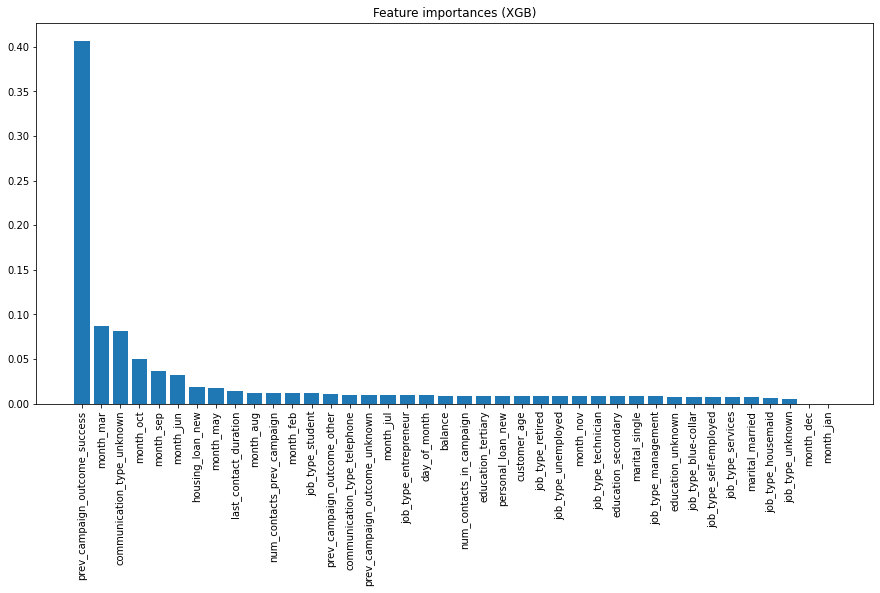

In [71]:
headers = ["name", "score"]
values = sorted(zip(df5.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [72]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[4065,   94],
       [ 380,  139]])

In [73]:
y_pred = model_xgb.predict(X_test)

In [74]:
for item in np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1):
  print(item)

[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0

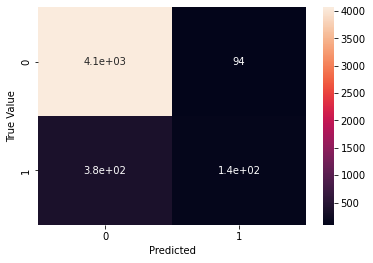

In [75]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

## Scaling the Features

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# **Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

In [78]:
y_pred_log = classifier.predict(X_test_scaled)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmlog = confusion_matrix(y_test,y_pred_log)
accuracy = accuracy_score(y_test,y_pred_log)
print(cmlog)
print(accuracy)

[[4093   66]
 [ 408  111]]
0.8986746472851646


# **KNN**

In [80]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [81]:
y_pred_knn = knn.predict(X_test_scaled)

In [82]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[4036  123]
 [ 399  120]]
0.8884138520735357


# **SVM**

In [83]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=0)
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear', random_state=0)

In [84]:
y_pred_svm = svc.predict(X_test)

In [85]:
cmsvc = confusion_matrix(y_test,y_pred_svm)
accuracy = accuracy_score(y_test,y_pred_svm)
print(cmsvc)
print(accuracy)

[[4159    0]
 [ 519    0]]
0.8890551517742625


# **Kernal SVM**

In [86]:
from sklearn.svm import SVC
kernel = SVC(kernel='rbf',random_state=0)
kernel.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [87]:
y_pred_kernal = kernel.predict(X_test_scaled)

In [88]:
cmkernal = confusion_matrix(y_test,y_pred_kernal)
accuracy = accuracy_score(y_test,y_pred_kernal)
print(cmkernal)
print(accuracy)

[[4090   69]
 [ 416  103]]
0.8963232150491663


# **Naive Bayes Model**

In [89]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train_scaled,y_train)

GaussianNB()

In [90]:
y_pred_NB = bayes.predict(X_test_scaled) 

In [91]:
cmNB = confusion_matrix(y_test,y_pred_NB)
accuracy = accuracy_score(y_test,y_pred_NB)
print(cmNB)
print(accuracy)

[[3834  325]
 [ 296  223]]
0.8672509619495511


# **Decision Tree Classification**

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state =0)
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
y_pred_DTC = dtc.predict(X_test_scaled)

In [94]:
cmdtc = confusion_matrix(y_test,y_pred_DTC)
accuracy = accuracy_score(y_test,y_pred_DTC)
print(cmdtc)
print(accuracy)

[[3793  366]
 [ 341  178]]
0.8488670371953826


# **Random Forest Classification**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [96]:
y_pred_rfc = rfc.predict(X_test)

In [97]:
cmrfc = confusion_matrix(y_test,y_pred_rfc)
accuracy = accuracy_score(y_test,y_pred_rfc)
print(cmrfc)
print(accuracy)

[[4074   85]
 [ 408  111]]
0.8946130825138948


# Accuracy Scores of All Models

>XGB Classification --> 0.89867

>Logistic Regression --> 0.89867

>KNN Classifier --> 0.88841

>SVM Classification --> 0.88905

>Kernal SVM --> 0.89632

>Naive Bayes --> 0.86725

>Decision Tree Classifier --> 0.84886

>Random Forest Classification --> 0.89461


- From above result both XGB and Logistic Regression gives same accuracy. Thus, Choose any of these predict the new Customer's List

# Predicting the `New` Customer List

In [98]:
newDF = pd.read_excel("New_customer_list_data.xlsx")

In [99]:
newDF.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [100]:
newDF.shape

(7767, 16)

In [101]:
newDF.isnull().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [102]:
TdF = newDF.copy()

In [103]:
TdF['customer_age'] = TdF['customer_age'].replace(np.NaN,int(TdF['customer_age'].mean()))
TdF['personal_loan'] = TdF['personal_loan'].replace(np.NaN,'no')

In [104]:
num = TdF['num_contacts_in_campaign'].values.reshape(len(TdF),1)
prev = TdF['num_contacts_prev_campaign'].values.reshape(len(TdF),1)

In [105]:
index = []
for i in np.argwhere(np.isnan(np.concatenate((num,prev),axis=1))):
  index.append(i[0])

con = np.concatenate((num,prev),axis=1)
for i in index:
  con[i][0] = con[i][1]
dic = {}
for i in range(0,len(index)):
  dic[index[i]] = con[i][0]


In [106]:
n = TdF['num_contacts_in_campaign'].values
for i in range(0,len(n)):
  if i in dic:
    n[i] = dic[i]
TdF['num_contacts_in_campaign'] = pd.Series(n)

In [107]:
TdF.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [108]:
TdF = TdF.dropna()

In [109]:
TdF2 = TdF.copy()

In [110]:
numerical_features = [feature for feature in TdF2.columns if ((TdF2[feature].dtypes != 'O') & (feature not in ['term_deposit_subscribed']))]
print("Number of numerical variable : ",len(numerical_features))

TdF2[numerical_features].head()

Number of numerical variable :  6


,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,285.0,849,26,4.0,0
1,46.0,656.0,990,5,4.0,0
2,34.0,2.0,886,20,3.0,0
3,65.0,2880.0,913,23,1.0,0
4,52.0,1779.0,703,19,3.0,1


In [111]:
discrete_feature = [feature for feature in numerical_features if len(TdF2[feature].unique()) < 25]
print("Descrete variables Count : {}".format(len(discrete_feature)))

Descrete variables Count : 0


In [112]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['term_deposit_subscribed']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


In [113]:
TdF2 = TdF2.drop(['default'],axis=1)

In [114]:
TdF3 = TdF2[TdF2['num_contacts_in_campaign'] < 22]

In [115]:
TdF4 = TdF3[TdF3['num_contacts_in_campaign'] < 22]

In [116]:
cat_columns = ['job_type','marital','education','communication_type','month','prev_campaign_outcome']
for col in cat_columns:
  TdF4 = pd.concat([TdF4.drop(col,axis=1),pd.get_dummies(TdF4[col],prefix=col,prefix_sep="_",drop_first=True,dummy_na=False)],axis=1)

In [117]:
bool_columns = ['housing_loan', 'personal_loan']
for col in  bool_columns:
    TdF4[col+'_new']=TdF4[col].apply(lambda x : 1 if x == 'yes' else 0)
    TdF4.drop(col, axis=1,inplace=True)

In [118]:
TdF5 = TdF4.copy()

In [119]:
TdF5.iloc[0,:].values

array(['id_43823', 28.0, 285.0, 849, 26, 4.0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0], dtype=object)

In [120]:
result = model_xgb.predict(TdF5.iloc[:,1:].values)
print(len(result))

7562


> `1000` customers list who might be intrested for term deposit account

In [121]:
final = []
count = 0
for item in zip(TdF5.iloc[:,0].values,result):
  if item[1] == 1:
    final.append(list(item))
    count += 1
  if count == 1000:
    break

In [122]:
final

[['id_12681', 1],
 ['id_25779', 1],
 ['id_21998', 1],
 ['id_30669', 1],
 ['id_39196', 1],
 ['id_4355', 1],
 ['id_14411', 1],
 ['id_44309', 1],
 ['id_32074', 1],
 ['id_42760', 1],
 ['id_1895', 1],
 ['id_33092', 1],
 ['id_37445', 1],
 ['id_2221', 1],
 ['id_22130', 1],
 ['id_24856', 1],
 ['id_21940', 1],
 ['id_34809', 1],
 ['id_33355', 1],
 ['id_32396', 1],
 ['id_45113', 1],
 ['id_12016', 1],
 ['id_11949', 1],
 ['id_37525', 1],
 ['id_38285', 1],
 ['id_43154', 1],
 ['id_6592', 1],
 ['id_10748', 1],
 ['id_28143', 1],
 ['id_23778', 1],
 ['id_30565', 1],
 ['id_26849', 1],
 ['id_32954', 1],
 ['id_42365', 1],
 ['id_28659', 1],
 ['id_9030', 1],
 ['id_2305', 1],
 ['id_29427', 1],
 ['id_35641', 1],
 ['id_6522', 1],
 ['id_31073', 1],
 ['id_40475', 1],
 ['id_21010', 1],
 ['id_38725', 1],
 ['id_32577', 1],
 ['id_23380', 1],
 ['id_10165', 1],
 ['id_20650', 1],
 ['id_12967', 1],
 ['id_5320', 1],
 ['id_14164', 1],
 ['id_15512', 1],
 ['id_13624', 1],
 ['id_28923', 1],
 ['id_37673', 1],
 ['id_39513', 1],


## `1000` customers list who might be intrested for term deposit account

In [123]:
dFinal = pd.DataFrame(final,columns=['customer_id','status'])

In [124]:
dFinal.to_excel('result.xlsx')